---

# P5.A:  GMM을 이용한 밀도추정 (10점)

### 학습목표
- GMM 모델을 이용하여 밀도추정을 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습을 구현할 수 있다.

### 실습내용
Scikit-Learn의 GMM을 이용하여 군집화를 학습해 봅니다.  
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- Imports
- 1) 데이터 생성
- 2) GMM 모델 구현, 학습, Centroids, Density Contour 시각화 **<직접 구현>**
- 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화
- 4) Discussion **<작성>**

**이번 실습에서 여러분은 `2)` 부분의 코드와 `3)`을 직접 작성합니다.**

### 점수
- 코드 작성: 8점, `#<your code>` 한 부분 마다 2점.
- Discussion 작성: 2점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
%matplotlib inline

## 1) 데이터 생성
랜덤하게 데이터를 생성하며 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화합니다.

In [2]:
# 데이터 생성
X1, y1 = make_blobs(n_samples=1000, centers=((5, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.37, 0.95], [0.73, 0.6]]))
X2, y2 = make_blobs(n_samples=500, centers=1, random_state=42)
X = np.r_[X1, X2]
X[:, [0, 1]] = X[:, [1, 0]]

#데이터를 훈련 데이터와 테스트 데이터로 분류
# X_test는 P5.B에서 사용
X_train, X_test = train_test_split(X, test_size=0.1)

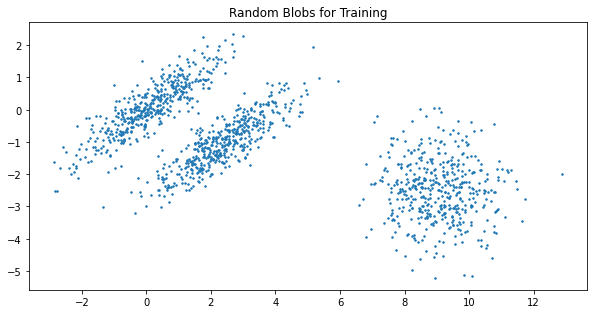

In [3]:
# 훈련 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=3)
plt.title('Random Blobs for Training')
plt.show() 

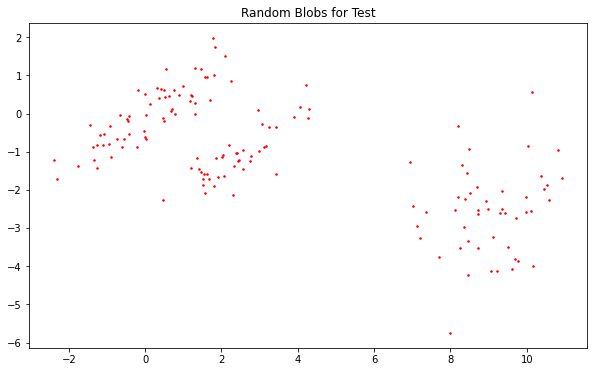

In [4]:
# 테스트 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
plt.plot(X_test[:, 0], X_test[:, 1], '.', markersize=3, color='r')
plt.title('Random Blobs for Test')
plt.show() 

## 2) GMM 모델 구현, 학습, 시각화

 - Scikit-Learn의 `GaussianMixture` 클래스를 이용하여 GMM을 생성하고 `fit` 함수를 이용하여 학습해 봅니다.  
 - GaussianMixture의 `n_components`를 이용하면 군집의 갯수를 정할 수 있습니다. 이번 실습에서는 3개로 합니다.  
 - 또한, GMM을 생성할 때 하이퍼파라메터인 `n_init`을 10으로 설정해주세요

In [5]:
gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(X_train)

GaussianMixture(n_components=3, n_init=10)

이제 학습된 GMM 모델을 이용하여 다음 정보들을 획득할 수 있습니다.

**1. Centriods (군집 중심)**
 
**2. Density Contour (밀도 등고선)**
 
이어지는 셀들에서 이러한 정보들을 시각화합니다.

이때, GaussianMixture 클래스의 함수와 attributes를 이용합니다. 

- `GaussianMixture.means_`: returns Centroids
- `GaussianMixture.score_samples(array)`: returns log-likelihoods (for each sample)

(주의: 위의 셀에서 학습이 끝난 gmm 객체를 이후 모든 셀에서 이용합니다.)

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

**1) Centroids (군집 중심) 시각화**
- GMM 클래스로부터 군집 중심을 반환하여 시각화합니다. 

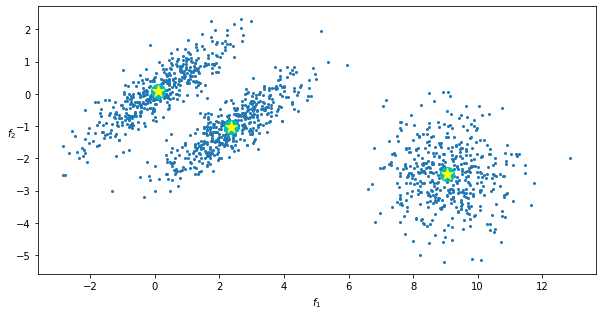

In [6]:
def visualization_centroids(gmm):
    # Centroids 시각화
    centroids = gmm.means_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, linewidths=1, color='c', zorder=10) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, linewidths=1, color='yellow', zorder=11) 

    
# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
    
# Centroids
visualization_centroids(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**2. Density Contour (밀도 등고선) 시각화**
- 밀도 등고선을 시각화하기 위해 2차원 평면공간에 촘촘한 격자점을 생성합니다.
- GMM 클래스로부터 격자점들의 위치에서의 **log-likelihoods** 를 반환하여 확률 밀도로써 사용합니다.
- matplotlib에서 지원하는 contourf 함수를 이용하여 밀도 등고선을 시각화합니다.

**주의**: GMM 클래스가 반환하는 log-likelihoods에서 likelihoods는 GMM이 가지고 있는 가우시안 분포들의 각각의 likelihoods가 아닌, 최종 가충 합으로 계산된 likelihoods 입니다.

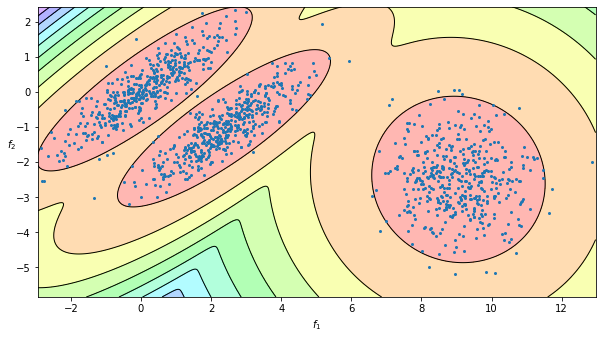

In [8]:
def visualization_contour(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # densities (log-likelihoods) 
    densities = gmm.score_samples(plane)

    densities = np.abs(densities.reshape(x.shape))
    cntr = plt.contourf(x, y, densities, levels=10, alpha=0.3, cmap='gist_rainbow')
    plt.contour(x, y, densities, levels=10, linewidths=1, colors='k')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

## 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화

GMM을 충분히 학습시키고 나면, GMM에 포함된 각 가우시안 분포에 해당하는 Covariance matrix를 확인할 수 있습니다.

예를 들어, 현재 학습된 GMM 모델의 Covariance matrix는 다음과 같습니다.


In [9]:
covariances = gmm.covariances_
print('Covariance matrix 1\n', covariances[0],
     '\n\nCovariance matrix 2\n', covariances[1],
      '\n\nCovariance matrix 3\n', covariances[2])

Covariance matrix 1
 [[1.19591463 0.75334696]
 [0.75334696 0.65211059]] 

Covariance matrix 2
 [[ 0.97632238 -0.04763212]
 [-0.04763212  0.89943974]] 

Covariance matrix 3
 [[1.24130998 0.82326371]
 [0.82326371 0.72039089]]


앞선 셀에서 학습한 GMM의 Covariance는 아무런 제약 조건이 없지만(default), 제약 조건을 추가하여 Covariancce를 학습할 수 있습니다.

이어지는 셀에서는 GMM 모델을 생성할 때 Covariance type를 다른 type ('tied', 'diag')로 바꾸어 학습하여 클러스터의 모양이 어떻게 변하는지 확인합니다.

**Covariance type: Tied**

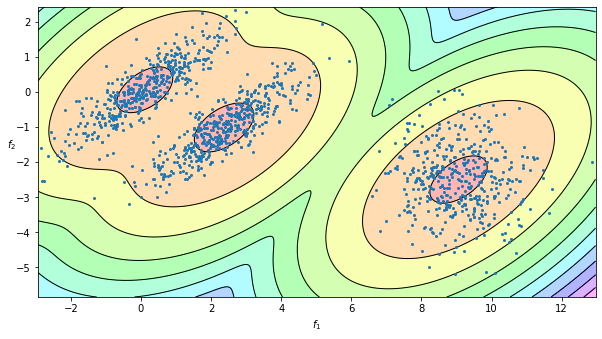

In [20]:
gmm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied')
gmm_tied.fit(X_train)

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_tied)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**Covariance type: diag**

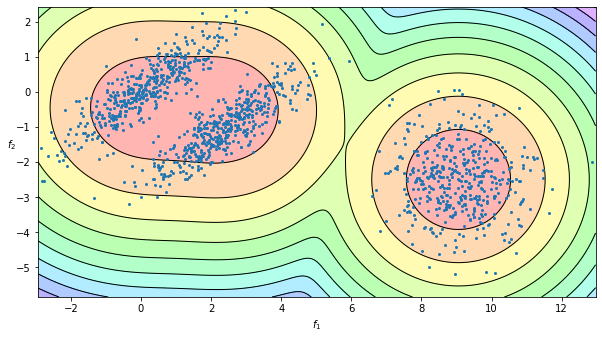

In [11]:
gmm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag')
gmm_diag.fit(X_train) 

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_diag)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

---

## 4) Discussion (각 0.5점)

**1) 모수적 밀도추정과 비모수적 밀도추정을 비교하여 설명하세요.**

[답변작성]<br>
모수적 밀도 추정은 샘플들의 분포가 수학적 분포일 것이라는 가정하에서 밀도 추정을 진행한다. 따라서 모수적 밀도 추정에서는 일반적으로 ML(Maximum Likelihood)을 통해 수학적 분포의 파라미터를 구하는 방식으로 밀도를 추정한다. 수학적 분포의 대표적 예로는 gaussian 분포가 있다.  <br>
이와 달리, 비모수적 밀도 추정은 샘플들의 분포가 수학적 분포라는 가정이 불가능한 상태에서 사용한다. 비모수적 밀도 추정에서는 샘플의 개수를 확률 값으로 변환하여 밀도를 추정한다. 예를 들어, 히스토그램은 비모수적 밀도 추정에 속한다. 

**2) EM 알고리즘을 이용한 GMM 밀도추정 방법에 대해  설명하세요.**

[답변작성]<br>
EM 알고리즘은 각 샘플들의 소속 정보 추정과 gaussian의 확률분포를 추정하는 과정은 반복해서 진행하는 과정이다. 이를 사용한 GMM의 밀도 추정 과정은 다음과 같다. 
1. 파라미터 초기화 <br>
효율성을 위해 K-means를 통해 군집화를 진행한 후, 결과를 기준으로 gaussian들의 파라미터를 초기화한다. 
2. 소속 정보 추정(E) <br>
초기화된 gaussian의 평균 벡터, 공분산 행렬, 혼합 계수를 사용하여 각 샘플의 소속 정보를 추정한다. 
3. 확률분포 추정(M) <br>
앞서 구한 소속 정보를 토대로, equality lagrangian 승수법을 적용하여 파라미터들을 구한다. 

위의 2번과 3번 과정을 반복하는 것이 EM 알고리즘이며, stop condition을 만족할 때까지 해당 과정을 반복하여 밀도를 추정한다. 

**3) K-means를 이용한 군집화와 GMM을 이용한 밀도추정 기반의 군집화의 차이에 대해 설명하세요.**

[답변작성]<br>
두 가지 군집화를 각 샘플의 소속 정보를 나타내는 방식에서 차이를 보인다. <br>
K-means는 군집 배정 행렬을 통해서 각 샘플의 소속 정보를 나타낸다. 이때 소속 정보는 0또는 1로 표기되어, 각 샘플들은 확실한 소속 군집을 갖는다. 그러나 GMM은 여러 군집에 확률적으로 분포한다. 따라서 각 샘플의 소속 확률이 0에서 1사이의 값으로 나타난다. 

**4) 앞서 학습된 GMM의 Covariance matrix들을 출력해보았습니다. 출력된 각 Covariance matrix (cluster1~3)의 값과 시각화한 밀도 등고선의 모양을 연결지어 설명해보세요.**

[답변작성]<br>
Covariance matrix를 통해서 각각 data의 분포를 예상할 수 있다. <br>
우선 각각의 matrix의 1행 1열, 2행 2열 값은 x축과 y축 값을 통해 비율을 추정할 수 있다. matrix 1과 3은 선형의 형태로 f1의 범위가 f2보다 길게 형성되어있기 때문에, 1행 1열의 값이 2행 2열의 값보다 크게 나타난다. 그리고 matrix 2는 비교적 원형의 분포를 보이기에, 1행 1열과 2행 2열의 값이 유사하게 나타낸다. <br>
covariance matrix의 1행 2열과 2행 1열의 값은 데이터 분포 사이의 관계를 나타낸다. matrix 1과 3은 우상향하는 선형 형태를 보이기에, 각각 0.75, 0.82의 값을 갖는다. 그러나 matrix 2는 원형 형태로 상관관계가 낮게 나타나서, -0.04라는 낮은 값을 갖는다. <br>
<br>
covariance matrix를 바탕으로 밀도 등고선을 시각화할 때, 이번 과제에서는 3가지의 covariance type을 지정해서 진행했다. <br>
첫 번째, full로 지정하여 진행했다. 이때는 각각의 분포가 개별의 covariance matrix를 갖는다. 따라서 위에서 언급한 각각의 covariance matrix를 바탕으로 등고선의 모양이 나타난다. matrix 1과 3은 우상향하는 선형의 형태로 등고선이 나타나며, matrix 2는 원 형태의 등고선이 나타난다. <br>
두 번째, tied로 지정하여 진행했다. tied를 사용하면 모든 군집이 동일한 모양의 covariance matrix를 갖는다. 따라서 동일한 모양의 등고선 형태를 나타낸다. <br>
세 번째, diag로 지정하여 진행했다. diag를 사용하면 covariance matrix가 대각 행렬로 구성된다. 1행 2열과 2행 1열이 0의 값을 갖게 되고, 따라서 등고선의 형태는 타원 또는 원의 형태로 나타난다.

---

# P5.B: 학습한 GMM (P5.A의 결과)를 이용한 새로운 샘플(Test) 분류 (3점)
### 학습목표
- 학습한 GMM 모델을 이용하여 새로운 데이터를 분류할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 학습된 GMM을 이용하여 클래스 분류 **<직접 구현>** 
- 2) 결정 경계 시각화

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.

### 점수
- 코드 작성: 3점, `#<your code>`

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## 1) 학습된 GMM을 이용하여 클래스 분류

- 새로운 샘플 (test dataset)이 어느 군집에 속해있는지 분류합니다.
- GaussianMixture.predict(array) 함수를 이용합니다.

훈련 데이터로 학습한 GMM을 새로운 샘플들 (Test dataset)에 대한 분류를 진행합니다. 

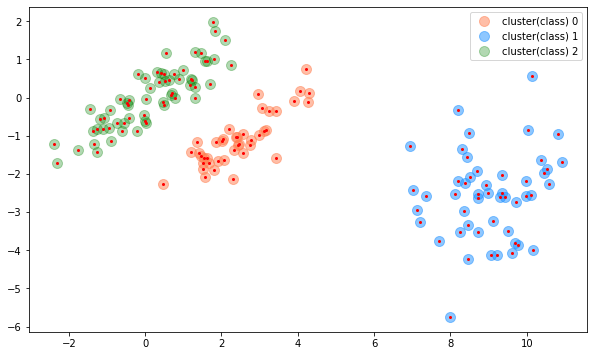

In [12]:
def classification(gmm):
    y = gmm.predict(X_test)

    # 테스트 데이터에 대해 Class 분류
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 0], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 0],
                label='cluster(class) 0', marker='o', color='coral', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 1], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 1],
                label='cluster(class) 1', marker='o', color='dodgerblue', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 2], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 2],
                label='cluster(class) 2', marker='o', color='green', alpha=0.3, s=100)


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 테스트 데이터셋의 샘플 분류
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()
plt.show()

## 2) 결정 경계 시각화

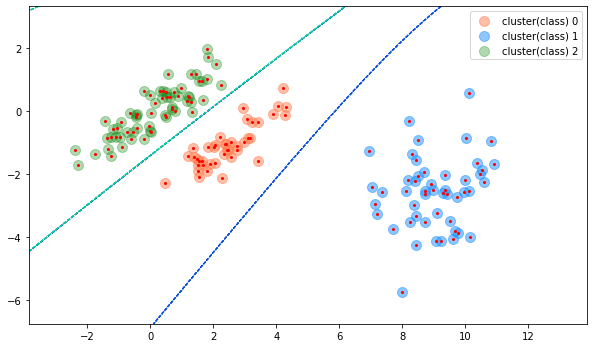

In [13]:
def visualization_decision_boundary(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # 결정 경계 시각화
    Z = gmm.predict(plane)
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, linewidths=1, cmap='winter', linestyles='dashed')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 위에서 진행한 분류 및 시각화
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()

# 결정 경계 시각화
visualization_decision_boundary(gmm)
plt.show()

# P5.C: 학습한 GMM (P5.A의 결과)를 이용한 이상치 탐지 (2점)
### 학습목표
- 학습한 GMM 모델을 이용하여 이상치 탐지를 할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 밀도 임계값 지정 **<직접 구현>**
- 2) 이상치 시각화 

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 2점, `#<your code>` 한 부분 마다 1점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

#### Outlier
![Outlier](https://miro.medium.com/max/1400/1*w5HzgB5ekxQ6Nwmx5ggn8Q.jpeg)

GMM을 이상치 탐지에 사용할 수 있습니다. 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있습니다. 예를 들어 결함 제품의 비율이 4%라고 하면 밀도 임곗값을 이 값으로 지정하여 임계 밀도보다 낮은 지역에 있는 샘플을 얻을 수 있습니다.

## 1) 밀도 임계값 지정

- **학습 데이터**의 이상치 탐지를 위해 각 샘플에 대한 확률 밀도 **(log-likelihoods)** 를 구합니다. (**GaussianMixture.score_samples()** 함수 이용)
- **np.percentile(array, n)** 함수를 이용하여 입력 array의 성분 값들 중 n percentile (n% 이하의 값에 대한 경곗값)를 반환합니다.
- 본 실습에서는 n=4 를 이용합니다.

In [18]:
densities = gmm.score_samples(X_train)

# 밀도 임계값 지정
threshold = np.percentile(X_train, 4)

# threshold 보다 작은 확률 밀도를 가진 샘플을 이상치로 탐지
anomalies = X_train[densities < threshold]

## 2) 이상치 시각화

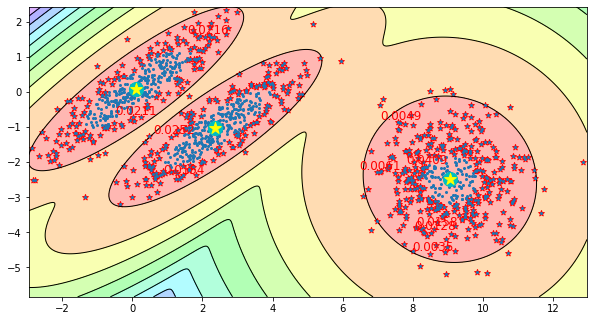

In [19]:
def visualization_likelihood(i):
    posX, posY = anomalies[i][0]-0.5, anomalies[i][1]+0.1
    likelihood = round(np.exp(gmm.score_samples(anomalies[i].reshape(1, -1)))[0].item(), 4)
    plt.text(posX, posY, f'{likelihood}', fontdict={'size': 12}, color='red')


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')


visualization_centroids(gmm)
visualization_contour(gmm)

# visualization likelihoods (10 samples)
for i in range(10):
    visualization_likelihood(i)

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()